In [ ]:

features = [
    'record_hour',
    'temperature',
    'humidity',
    'wind_speed',
    'solar_radiation',
    'rainfall',
    'is_holiday',
    'is_functioning_day'
]

target = 'bike_count'

df = df.loc[:, ~df.columns.duplicated()]

X = df[features].copy()
y = df[target].copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Daten bereit. Spaltenanzahl: {X_train.shape[1]} (Muss 8 sein!)")

✅ Daten bereit. Spaltenanzahl: 8 (Muss 8 sein!)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

print("🤖 Trainiere das Modell (das kann kurz dauern)...")
model = RandomForestRegressor(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


predictions = model.predict(X_test)


r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("-" * 30)
print(f"✅ Training abgeschlossen!")
print(f"Genauigkeit (R² Score): {r2:.2f}") 
print(f"Durchschnittlicher Fehler: {mae:.1f} Räder")
print("-" * 30)
print("Info: Ein R² von 1.0 wäre perfekt. Alles über 0.8 ist schon sehr gut!")

🤖 Trainiere das Modell (das kann kurz dauern)...
------------------------------
✅ Training abgeschlossen!
Genauigkeit (R² Score): 0.85
Durchschnittlicher Fehler: 156.7 Räder
------------------------------
Info: Ein R² von 1.0 wäre perfekt. Alles über 0.8 ist schon sehr gut!


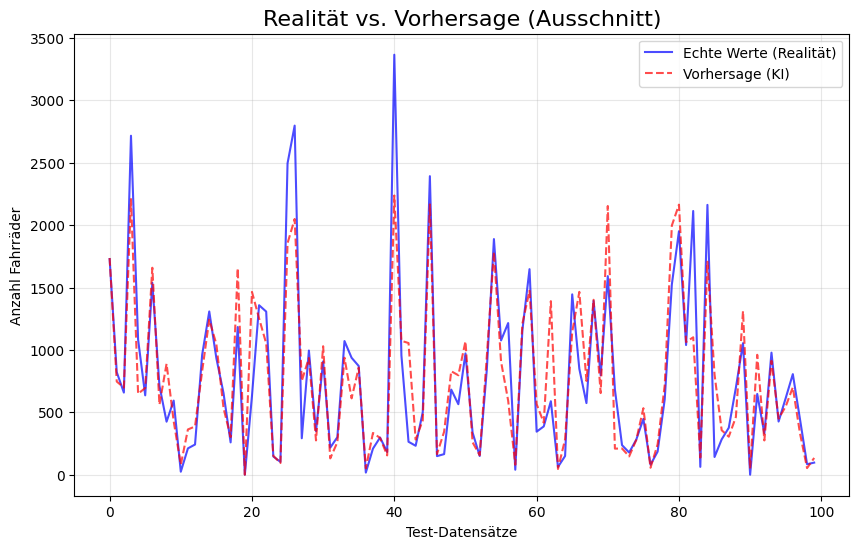

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

plt.plot(y_test.values[:100], label='Echte Werte (Realität)', color='blue', alpha=0.7)
plt.plot(predictions[:100], label='Vorhersage (KI)', color='red', linestyle='--', alpha=0.7)

plt.title('Realität vs. Vorhersage (Ausschnitt)', fontsize=16)
plt.ylabel('Anzahl Fahrräder')
plt.xlabel('Test-Datensätze')
plt.legend()
plt.grid(True, alpha=0.3)

plt.savefig('../images/model_prediction_comparison.png')
plt.show()

C:\Users\walde\AppData\Local\Temp\ipykernel_5864\918362423.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp, palette='viridis')


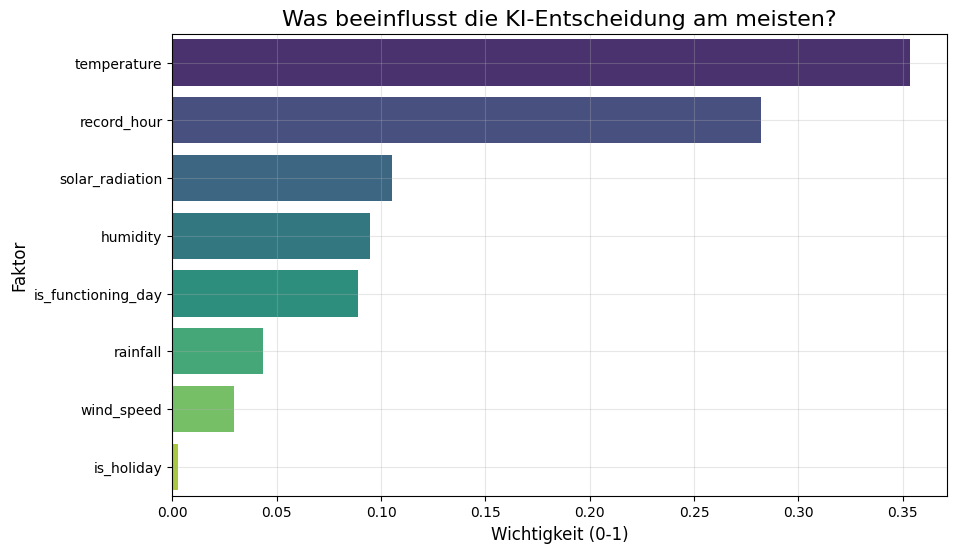

In [ ]:
# Dataframe erstellen
feature_imp = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plotten
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp, palette='viridis')

plt.title('Was beeinflusst die KI-Entscheidung am meisten?', fontsize=16)
plt.xlabel('Wichtigkeit (0-1)', fontsize=12)
plt.ylabel('Faktor', fontsize=12)
plt.grid(True, alpha=0.3)

# Speichern
plt.savefig('../images/feature_importance.png')
plt.show()

In [ ]:
import joblib
import os

os.makedirs('../models', exist_ok=True)

print("💾 Speichere das trainierte Modell...")

joblib.dump(model, '../models/bike_predictor_rf.pkl')

print("✅ Modell erfolgreich gespeichert unter 'models/bike_predictor_rf.pkl'")

💾 Speichere das trainierte Modell...
✅ Modell erfolgreich gespeichert unter 'models/bike_predictor_rf.pkl'
